# Loan Eligibility Prediction

* Introduction:

We are going to apply multiple models in order to

we are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information . we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

Steps : 
basics of visualizing the data .
how to compare between feature importance (at less in this data) .

feature selection

feature engineer

some simple techniques to process the data .
handling missing data .
how to deal with categorical and numerical data .
outliers data detection
but the most important thing that you will learn , is how to evaluate your model at every step you take .

some important libraries like sklearn, matplotlib, numpy, pandas, seaborn, scipy
fill the values using backward 'bfill' method for numerical columns , and most frequent value for categorical columns (simple techniques)
4 different models to train your data, so we can compare between them

a) logistic regression

b) KNeighborsClassifier

C) SVC

d) DecisionTreeClassifier

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [274]:
df = pd.read_csv("C:/Users/ROSHAN D K/Desktop/Python Projects/Data_mining_asses_2/train_loan_data.csv")
# test =  pd.read_csv("C:/Users/ROSHAN D K/Desktop/Python Projects/Data_mining_asses_2/test_loan_data.csv")
# Loan_ID = test.Loan_ID
# df = train.append(test) --Ask 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Describing the data

In [275]:
df.shape

(614, 13)

In [276]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [277]:
df.isna().sum()* 100/len(df)
# In most of the columns missing data is less than 5%

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [278]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [279]:
categorical_var = df[['Gender','Married','Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area','Loan_Status']]
numerical_var = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
for i, col in enumerate(categorical_var.columns):
  print(categorical_var.columns[i].upper(), '\n', categorical_var[str(col)].unique(), '\n')

GENDER 
 ['Male' 'Female' nan] 

MARRIED 
 ['No' 'Yes' nan] 

DEPENDENTS 
 ['0' '1' '2' '3+' nan] 

EDUCATION 
 ['Graduate' 'Not Graduate'] 

SELF_EMPLOYED 
 ['No' 'Yes' nan] 

CREDIT_HISTORY 
 [ 1.  0. nan] 

PROPERTY_AREA 
 ['Urban' 'Rural' 'Semiurban'] 

LOAN_STATUS 
 ['Y' 'N'] 



In [280]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Formating the data

In [282]:
df.drop(["Loan_ID"], axis = 1, inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [283]:
df['Dependents'] = df['Dependents'].str.replace("+","", regex = True)
df['Dependents'] = df['Dependents'].str.replace("3","4", regex = True)
df.Dependents.unique()

array(['0', '1', '2', '4', nan], dtype=object)

Handling missing values

In [284]:
# applying mode method to deal with the missing values in the categorical varaiables
df.Gender.fillna(df.Gender.mode()[0],inplace = True)
df.Gender.isna().sum()

0

In [285]:
df.Married.fillna(df.Married.mode()[0],inplace = True)
df.Married.isna().sum()

0

In [286]:
df.Dependents.fillna(df.Dependents.mode()[0],inplace = True)
df.Dependents.isna().sum()

0

In [287]:
# This contains more than 5% missing values
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace = True)
df.Self_Employed.isna().sum()

0

In [288]:
# This contains more than 5% missing values
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace = True)
df.Credit_History.isna().sum()

0

In [289]:
# applying median method to deal with the missing values in the numerical varaiables
df.LoanAmount.fillna(df.LoanAmount.median(),inplace = True)
df.LoanAmount.isna().sum()

0

In [290]:
# df.dropna(axis=0, subset=['Loan_Status'],inplace = True)
# # df.Loan_Status.fillna(df.Loan_Status.mode()[0],inplace = True)
# df.Loan_Status.isna().sum()

In [291]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace = True)
df.Loan_Amount_Term.isna().sum()
df.isna().sum()
#Any missing value present in the data

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [292]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

Checking Data Distribution

The percentage of Y class : 68.73
The percentage of N class : 31.27


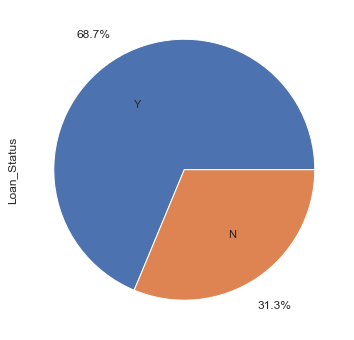

In [281]:
ex = df['Loan_Status'].value_counts()
ex.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6);
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)*100))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)*100))

In [293]:
# Dealing with outliers and normalization --> boxplot, log

In [294]:
# MAke it a function
# plt.hist(df.ApplicantIncome, bins = 10);
# sns.displot(data=df, x="ApplicantIncome", kde = True, bins = 20);
# plt.hist(df.LoanAmount, bins = 10);
# sns.displot(data=df, x="LoanAmount", kde = True, bins = 20);
# plt.hist(df.CoapplicantIncome, bins = 10);
# sns.displot(data=df, x="CoapplicantIncome", kde = True, bins = 20);

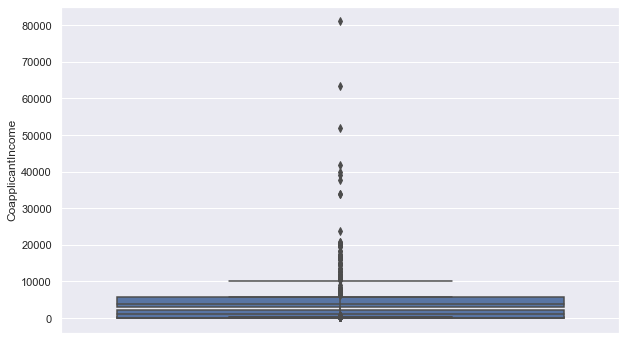

In [295]:
# make it a function
sns.boxplot(y = df.ApplicantIncome);
sns.boxplot(y = df.LoanAmount);
sns.boxplot(y = df.CoapplicantIncome);

 Bivariate analysis

In [296]:
def plot_all_cols(df, column_col, normalize=False):
    
    for index_col in df.columns:
        if index_col != column_col:
                crosstab_result = pd.crosstab(index=df[index_col], columns=df[column_col], normalize=True)
                crosstab_result.mul(100).plot.bar(rot=0)
          

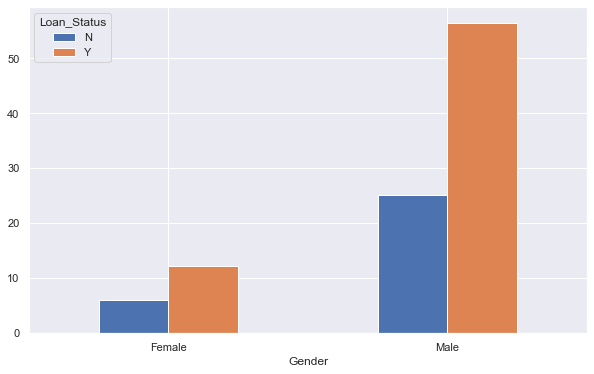

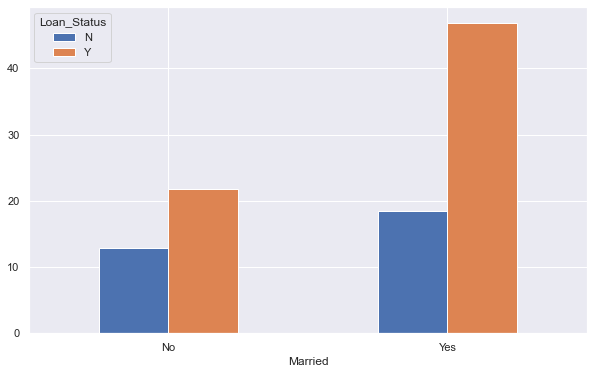

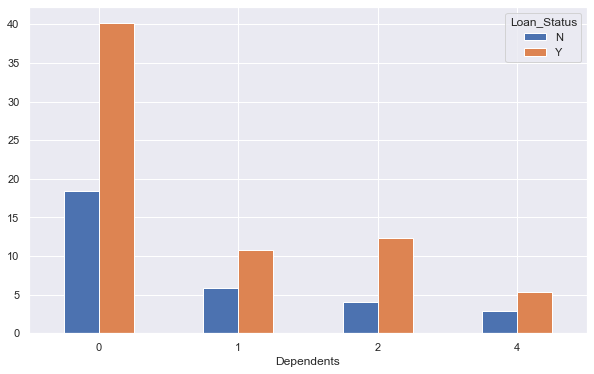

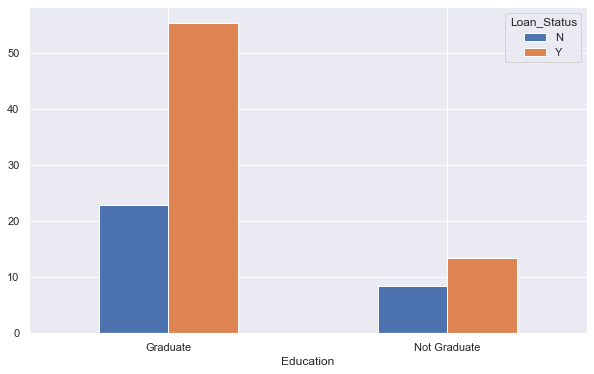

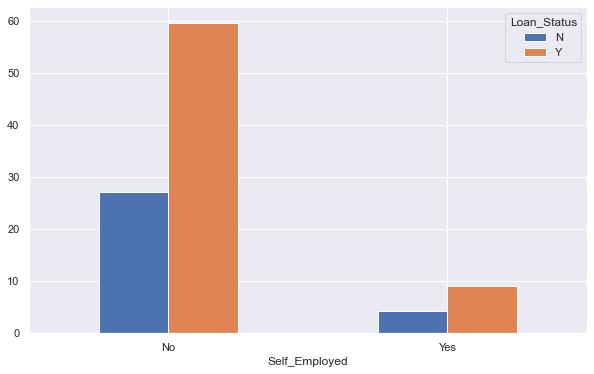

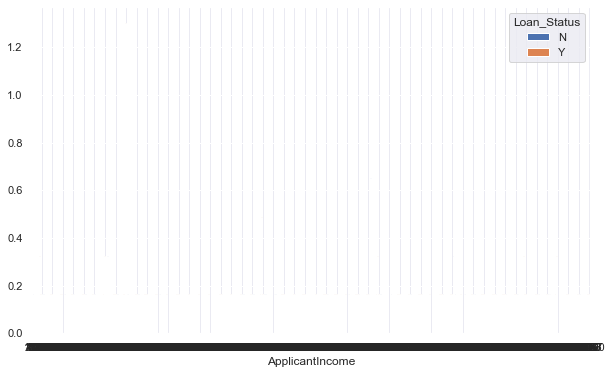

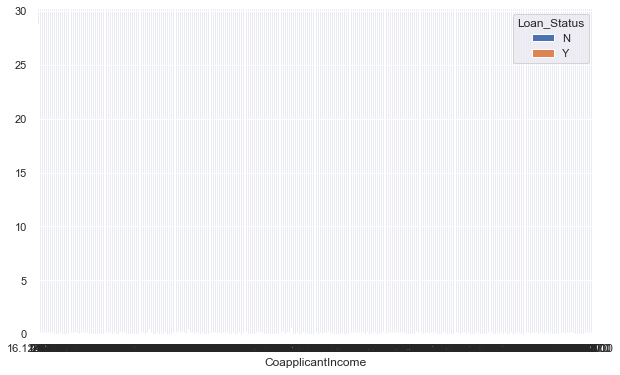

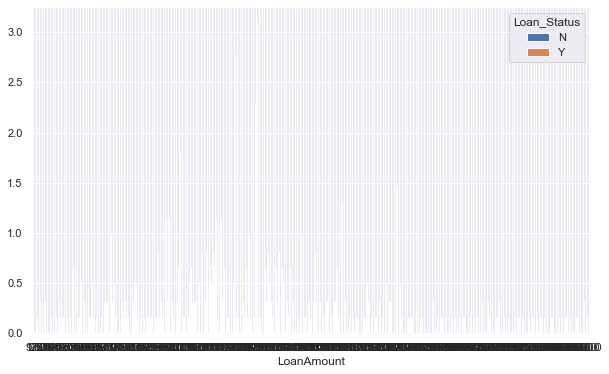

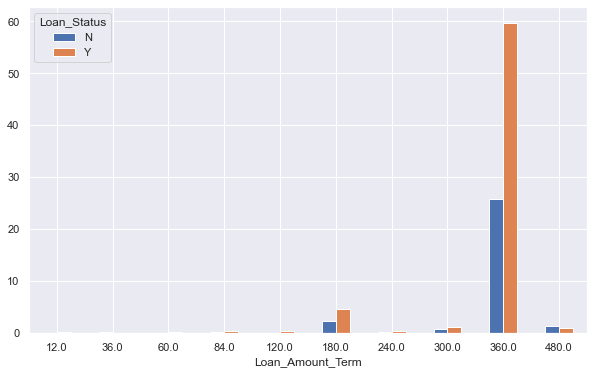

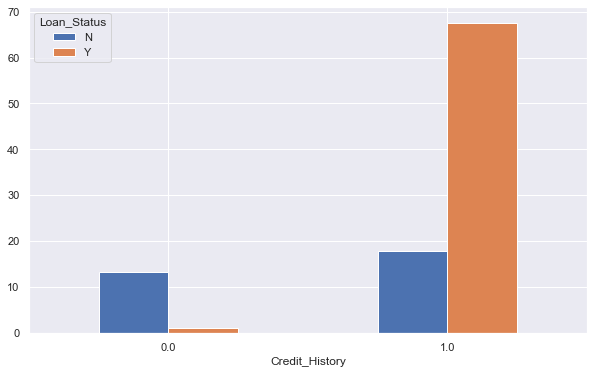

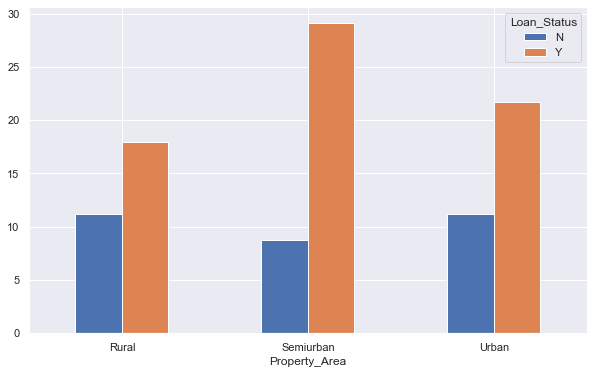

In [297]:
plot_all_cols(df, 'Loan_Status', normalize=True)

Handling Categorical variables - Label encoding

In [298]:
from sklearn.preprocessing import LabelEncoder

# create label encoder
label_encoder = LabelEncoder()

cat = ['Gender','Married','Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area','Loan_Status']
for cats in cat:
    df[cats] = label_encoder.fit_transform(df[cats])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


Feature scaling - For ML model

In [299]:
X = df.drop('Loan_Status', axis = 1)
y = df.Loan_Status

In [300]:
# Feature scaling
scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[scale] = st.fit_transform(X[scale])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1,2
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1,2
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1,2
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1,2


Splitting the dataset

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


Training the Model

In [303]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)
# average cross validation score yet to print

Logistic Regression Accuracy: 0.7886178861788617


In [304]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_acc)

K-Nearest Neighbors Accuracy: 0.7073170731707317


In [305]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
print("Support Vector Machine Accuracy:", svc_acc)

Support Vector Machine Accuracy: 0.7804878048780488


In [306]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.6910569105691057


In [307]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.7723577235772358


Gradient boosting

- Train and evaluate logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

- Train and evaluate K-nearest neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_acc)

- Train and evaluate support vector machine model
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
print("Support Vector Machine Accuracy:", svc_acc)

- Train and evaluate decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
